In [11]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Display plots inline
%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv("/content/student_dropout.csv")

print("Column names:", df.columns.tolist())
df.head()


Column names: ['attendance', 'grades', 'participation', 'dropout_risk']


,attendance,grades,participation,dropout_risk
0,78,6.563552,6,no
1,91,6.166674,7,yes
2,68,9.689376,0,no
3,54,8.756271,5,yes
4,82,7.978561,7,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   attendance     100 non-null    int64  
 1   grades         100 non-null    float64
 2   participation  100 non-null    int64  
 3   dropout_risk   100 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None
       attendance      grades  participation
count  100.000000  100.000000     100.000000
mean    69.580000    5.865635       3.980000
std     18.031499    2.165800       2.756004
min     41.000000    2.004163       0.000000
25%     54.000000    4.112823       2.000000
50%     68.000000    5.840801       4.000000
75%     86.000000    7.469105       6.250000
max     99.000000    9.981924       9.000000
attendance       0
grades           0
participation    0
dropout_risk     0
dtype: int64


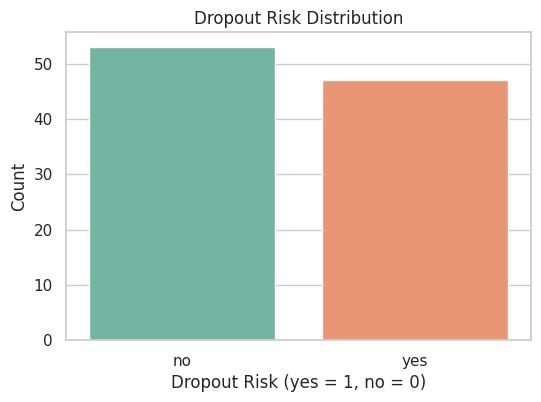

In [12]:
# STEP 2: Data Overview
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Countplot for Dropout Risk
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='dropout_risk', hue='dropout_risk', palette='Set2', legend=False)
plt.title("Dropout Risk Distribution")
plt.xlabel("Dropout Risk (yes = 1, no = 0)")
plt.ylabel("Count")
plt.show()


In [13]:
# STEP 3: Preprocessing
# Encode target column
df['dropout_risk'] = LabelEncoder().fit_transform(df['dropout_risk'])  # yes=1, no=0

# Feature and target split
X = df.drop('dropout_risk', axis=1)
y = df['dropout_risk']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# STEP 5: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.36      0.57      0.44         7

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.49        20
weighted avg       0.56      0.50      0.51        20



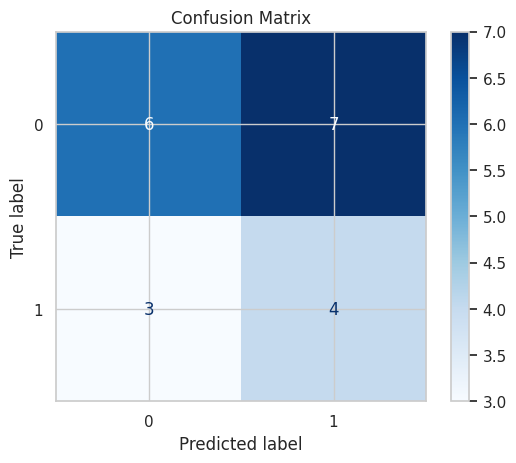

In [16]:
# STEP 6: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


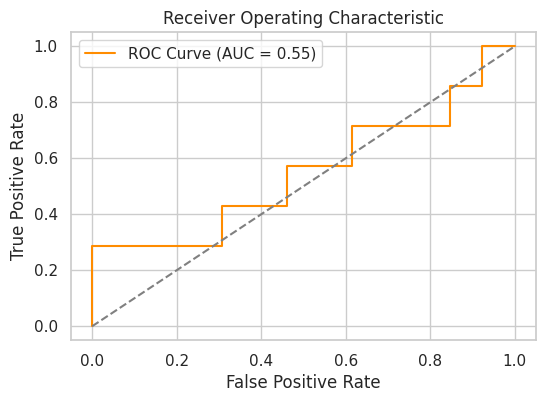

In [17]:
# ROC Curve
y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


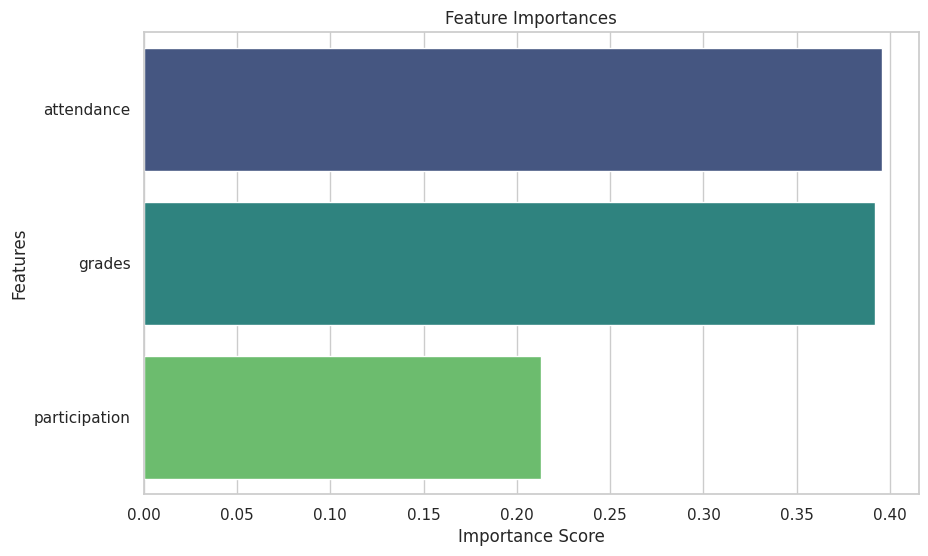

In [18]:
# Feature Importances
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, hue=features, palette='viridis', legend=False)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


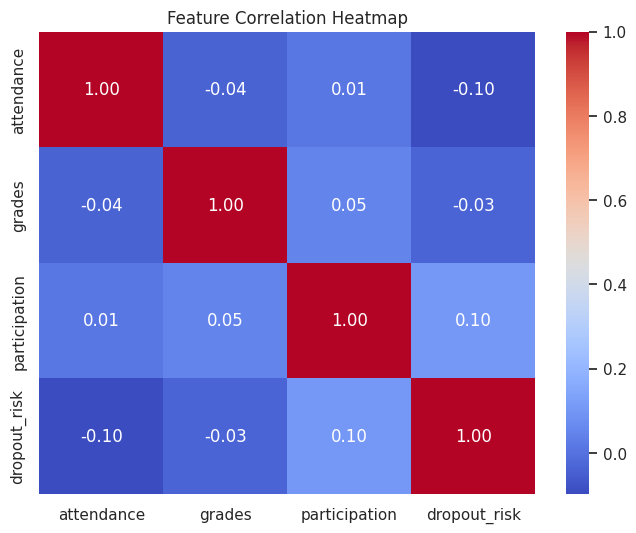

In [19]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
